In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as onp
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import pymc3 as pm
import seaborn as sns
import theano

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
X = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])

In [4]:
y = pd.DataFrame(diabetes['target'], columns = ['y'])

In [6]:
data = X
data = data * onp.shape(data)[0]
data['y'] = onp.log(y)
data['sex'][data['sex']>0] = 1
data['sex'][data['sex']<0] = 0
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,16.829551,1.0,27.269723,9.667581,-19.546786,-15.390777,-19.183174,-1.145780,8.799522,-7.799587,5.017280
1,-0.831851,0.0,-22.751535,-11.636903,-3.734336,-8.470196,32.889911,-17.456075,-30.201747,-40.754190,4.317488
2,37.702117,1.0,19.647436,-2.506410,-20.154957,-15.113954,-14.301322,-1.145780,1.265787,-11.461210,4.948760
3,-39.365819,0.0,-5.124996,-16.202149,5.388231,11.045842,-15.928606,15.164516,10.029874,-4.137965,5.327876
4,2.379313,0.0,-16.082034,9.667581,1.739204,6.893494,3.598801,-1.145780,-14.140219,-20.615266,4.905275
5,-40.971401,0.0,-17.987606,-8.593405,-30.493867,-35.045227,18.244356,-33.766371,-18.201730,-42.585001,4.574711
6,-20.098835,1.0,-20.845963,-7.071656,-17.722273,-10.961605,0.344233,-17.456075,-27.807524,-16.953644,4.927254
7,28.068625,1.0,-0.837460,29.450316,40.053988,48.140156,10.107937,7.824883,-15.830994,1.354469,4.143135
8,18.435133,1.0,27.269723,-17.723898,-6.167021,2.741145,-12.674038,-1.145780,-6.610762,5.016091,4.700480
9,-31.337909,0.0,17.265472,-14.680401,-5.558850,-15.252366,-11.046754,-1.145780,29.939456,-5.968776,5.736572


In [7]:
train, test = train_test_split(data, test_size=0.2)

In [81]:
age_tensor = theano.shared(train.age.values.astype('float64'))
sex_tensor = theano.shared(train.sex.values.astype('float64'))
bmi_tensor = theano.shared(train.bmi.values.astype('float64'))
bp_tensor = theano.shared(train.bp.values.astype('float64'))
y_tensor = theano.shared(train.y.values.astype('float64'))

In [82]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=100, shape=1)
    beta_age = pm.Normal('beta_age', mu=0, sd=10, shape=1)
    beta_sex = pm.Normal('beta_sex', mu=0, sd=10, shape=1)
    beta_bmi = pm.Normal('beta_bmi', mu=0, sd=10, shape=1)
    beta_bp = pm.Normal('beta_bp', mu=0, sd=10, shape=1)
    sigma = pm.HalfCauchy('sigma', beta=100, shape=1)
    mu_likelihood = alpha + beta_age * age_tensor + beta_sex * sex_tensor + beta_bmi * bmi_tensor + beta_bp * bp_tensor
    y_likelihood = pm.Normal('y', mu=mu_likelihood, sd=sigma, observed=y_tensor)

In [64]:
with model:
    step = pm.NUTS()
    hmc_trace = pm.sample(draws=50000, tune=1000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta_bp, beta_bmi, beta_sex, beta_age, alpha]
Sampling 2 chains: 100%|██████████| 102000/102000 [01:17<00:00, 1316.97draws/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha__0,4.884993,0.033934,0.000115,4.818505,4.951834,101355.046838,0.999990
beta_age__0,0.000977,0.001225,0.000003,-0.001419,0.003389,108604.177172,0.999998
beta_sex__0,-0.029465,0.050403,0.000157,-0.128025,0.069713,99867.415885,0.999992
beta_bmi__0,0.012149,0.001269,0.000004,0.009646,0.014603,103221.447549,1.000009
beta_bp__0,0.005752,0.001344,0.000005,0.003150,0.008406,105206.591213,0.999991
sigma__0,0.454529,0.017310,0.000048,0.421577,0.489192,118963.295423,0.999990


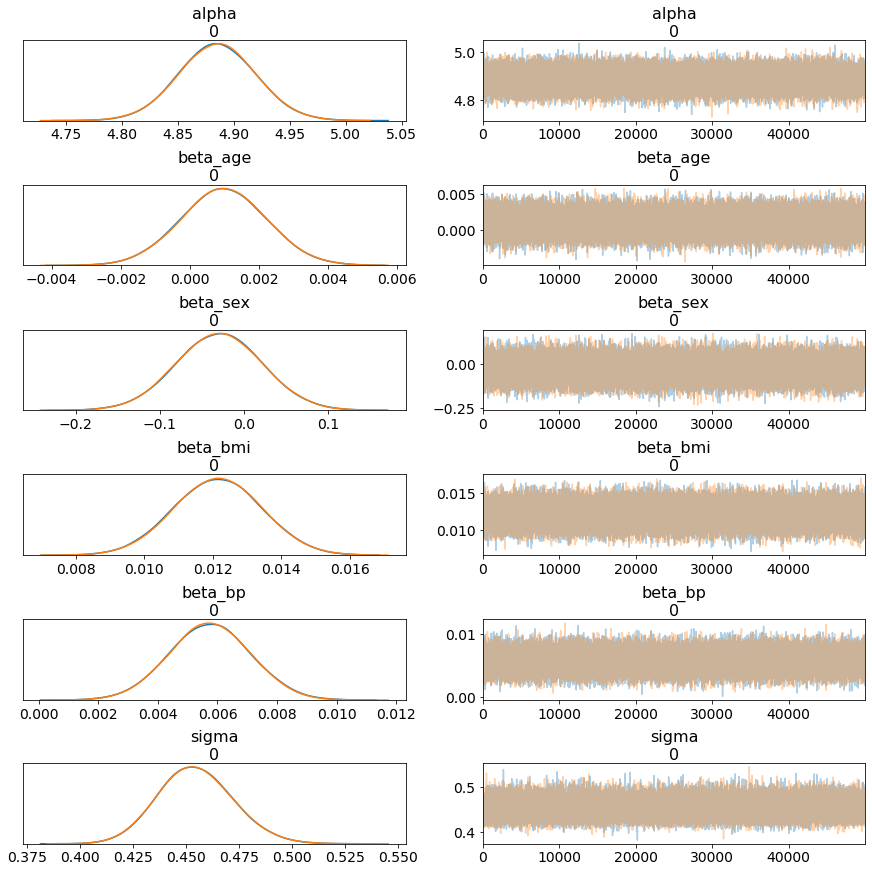

In [65]:
pm.traceplot(hmc_trace)
pm.summary(hmc_trace)

In [83]:
map_tensor_batch = {age_tensor: pm.Minibatch(train.age.values, 100),
                    sex_tensor: pm.Minibatch(train.sex.values, 100),
                    bmi_tensor: pm.Minibatch(train.bmi.values, 100),
                    bp_tensor: pm.Minibatch(train.bp.values, 100),
                    y_tensor: pm.Minibatch(train.y.values, 100)}

/Users/annamenacher/anaconda3/lib/python3.7/site-packages/pymc3/data.py:245: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


In [84]:
with model:
    advi_fit = pm.fit(method='asvgd', n=50000, more_replacements=map_tensor_batch)
    #advi_fit = pm.fit(method=pm.ADVI(), n=5000, more_replacements=map_tensor_batch)

/Users/annamenacher/anaconda3/lib/python3.7/site-packages/pymc3/variational/inference.py:603: UserWarning: You are using experimental inference Operator. It requires careful choice of temperature, default is 1. Default temperature works well for low dimensional problems and for significant `n_obj_mc`. Temperature > 1 gives more exploration power to algorithm, < 1 leads to undesirable results. Please take it in account when looking at inference result. Posterior variance is often **underestimated** when using temperature = 1.
  warnings.warn('You are using experimental inference Operator. '
  0%|          | 0/50000 [00:00<?, ?it/s]/Users/annamenacher/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

In [74]:
#advi_elbo = pd.DataFrame(
#    {'log-ELBO': -np.log(advi_fit.hist),
#     'n': np.arange(advi_fit.hist.shape[0])})

#_ = sns.lineplot(y='log-ELBO', x='n', data=advi_elbo)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,4.881901,0.061165,0.000620,4.761375,4.998133
beta_age__0,0.000882,0.000548,0.000005,-0.000203,0.001927
beta_sex__0,-0.027643,0.092432,0.000953,-0.205846,0.153462
beta_bmi__0,0.011686,0.000545,0.000006,0.010564,0.012716
beta_bp__0,0.005740,0.000346,0.000003,0.005088,0.006440
sigma__0,0.458640,0.031205,0.000272,0.398216,0.518979


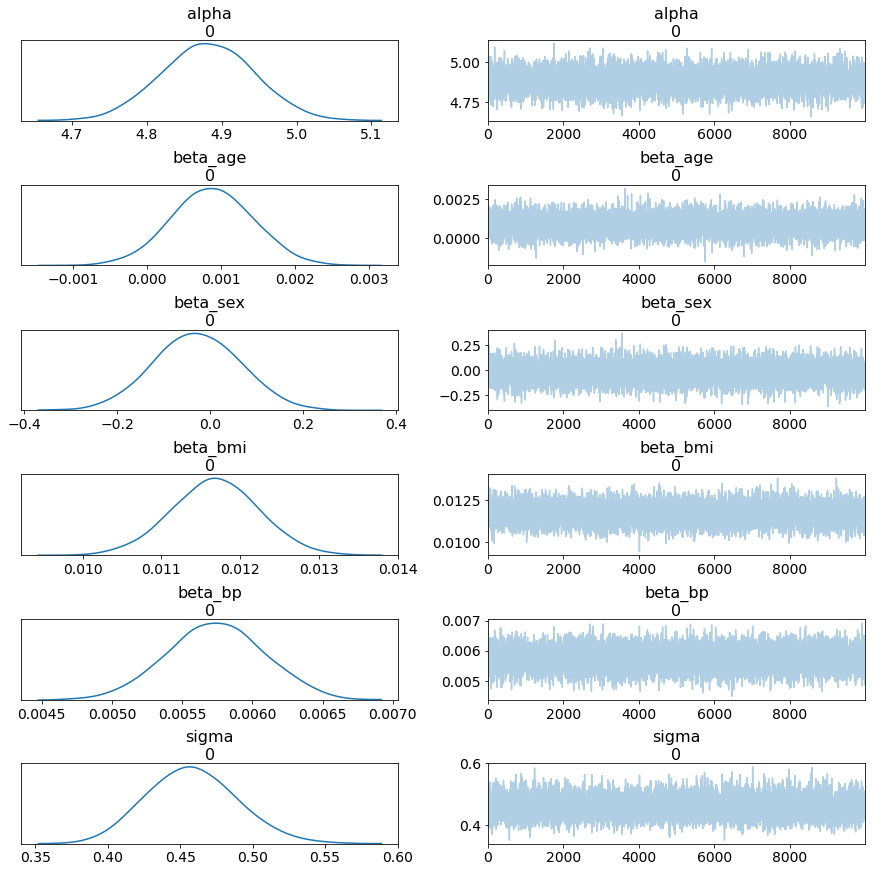

In [85]:
advi_trace = advi_fit.sample(10000)
pm.traceplot(advi_trace)
pm.summary(advi_trace)

In [86]:
# Test

In [87]:
age_tensor.set_value(test.age.values.astype('float64'))
sex_tensor.set_value(test.sex.values.astype('float64'))
bmi_tensor.set_value(test.bmi.values.astype('float64'))
bp_tensor.set_value(test.bp.values.astype('float64'))
y_tensor.set_value(test.y.values.astype('float64'))

/Users/annamenacher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 1000/1000 [00:09<00:00, 109.39it/s]
/Users/annamenacher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  after removing the cwd from sys.path.
100%|██████████| 1000/1000 [00:14<00:00, 106.38it/s]


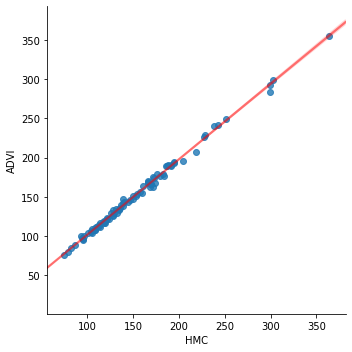

In [88]:
hmc_posterior_pred = pm.sample_ppc(hmc_trace, 1000, model)
hmc_predictions = np.mean(np.exp(hmc_posterior_pred['y']), axis=0)

advi_posterior_pred = pm.sample_ppc(advi_trace, 1000, model)
advi_predictions = np.mean(np.exp(advi_posterior_pred['y']), axis=0)

prediction_data = pd.DataFrame(
    {'HMC': hmc_predictions, 
     'ADVI': advi_predictions, 
     'actual': np.exp(test.y),
     'error_HMC': hmc_predictions - np.exp(test.y), 
     'error_ADVI': advi_predictions - np.exp(test.y)})

g = sns.lmplot(y='ADVI', x='HMC', data=prediction_data,
               line_kws={'color': 'red', 'alpha': 0.5})
g.set(ylim=1)

In [89]:
np.shape(hmc_predictions)

(89,)

In [90]:
results = pd.DataFrame(np.exp(test.y))
results['pred_hmc'] = hmc_predictions
results['pred_advi'] = advi_predictions
results

,y,pred_hmc,pred_advi
346,139.0,169.565557,166.000799
117,281.0,165.693467,169.970881
183,185.0,138.910484,142.520049
161,217.0,237.714717,240.873307
101,102.0,130.594228,134.275843
441,57.0,78.389989,79.564292
341,263.0,227.762079,226.569205
309,142.0,138.930775,147.034808
52,59.0,134.524856,134.808757
119,200.0,113.743883,111.400780


In [91]:
np.sqrt(np.sum(np.square(np.array(results['y'])- np.array(results['pred_hmc']))))

590.840319207984

In [92]:
np.sqrt(np.sum(np.square(np.array(results['y'])- np.array(results['pred_advi']))))

586.0756130860325

In [93]:
import numpy as np

__all__ = [
    'all_bounds',
    'error_bounds',
    'wasserstein_bounds',
    'divergence_bound'
]


def all_bounds(log_weights, samples=None, moment_bound_fn=None,
               q_var=None, p_var=None, log_norm_bound=None):
    """Compute all error and distance bounds.
    Compute error and distance bounds between distribution `p` and `q` using
    samples from `q`. The distributions need not be normalized.
    Parameters
    ----------
    log_weights : array-like of integers, shape=(n_samples,)
        log weights `log p(x_i) - log q(x_i)`, where `x_i` is sampled from `q`
        and `p` may be an unnormalized distribution
    samples : array-like matrix, shape=(n_samples, n_dimensions)
        samples `x_i` associated with log weights
    moment_bound_fn : array-like matrix, shape=(n_variant_types, n_signatures)
        `moment_bound_fn(p)` should return a bound on `min_y E[(x_i - y)^p]^(1/p)`.
        It must be provided if `samples` is `None`. Must support `p = 2`
        and `p = 4`.
    q_var : float
        (Bound on) the variance of `q`.
    p_var : float
        (Bound on) the variance of `p`.
    log_norm_bound : float
        Bound on the overall log normalization constant (the log marginal
        likelihood when `p` is the unnormalized log posterior)
    Returns
    -------
    results : dict
        contains the following bounds: `mean_error`, `var_error`, `std_error`,
        `d2`, `W1`, `W2`."""
    d2 = divergence_bound(log_weights, log_norm_bound=log_norm_bound)
    results = wasserstein_bounds(d2, samples, moment_bound_fn)

    if q_var is None and samples is not None:
        q_var = np.cov(samples)
    results.update(error_bounds(q_var=q_var, p_var=p_var, **results))
    results['d2'] = d2
    return results


def error_bounds(W1=np.inf, W2=np.inf, q_var=np.inf, p_var=np.inf):
    """Compute error bounds.
    Compute bounds on differences in the means, standard deviations, and
    covariances of `p` and `q` using (bounds on) the 1- and 2-Wasserstein
    distance.
    Parameters
    ----------
    W1 : float
        (Bound on) the 1-Wasserstein distance between `p` and `q`.
    W2 : float
        (Bound on) the 2-Wasserstein distance between `p` and `q`.
    q_var : float
        (Bound on) the variance of `q`.
    p_var : float
        (Bound on) the variance of `p`.
    Returns
    -------
    results : dict
        contains the following bounds: `mean_error`, `var_error`, `std_error`."""
    results = dict()
    results['mean_error'] = mean_bound(min(W1, W2))
    results['std_error'] = std_bound(W2)
    results['var_error'] = var_bound(W2, q_var, p_var)
    return results


def wasserstein_bounds(d2, samples=None, moment_bound_fn=None):
    """Compute all bounds.
    Compute 1- and 2-Wasserstein distance bounds between distribution `p` and
    `q` using a bound on the 2-divergence and moment bounds.
    Parameters
    ----------
    d2 : float
        (Bound on) the 2-divergence between `p` and `q`.
    samples : array-like matrix, shape=(n_samples, n_dimensions)
        samples from `q`.
    moment_bound_fn : array-like matrix, shape=(n_variant_types, n_signatures)
        `moment_bound_fn(a)` should return a bound on `min_y E[(x_i - y)^a]^(1/a)`.
        It must be provided if `samples` is `None`. Must support `a = 2`
        and `a = 4`.
    Returns
    -------
    results : dict
        contains the following bounds: `W1`, `W2`."""
    results = dict()
    if moment_bound_fn is None:
        if samples is None:
            raise ValueError('must provides samples if moment_bound_fn not given')
        samples = np.asarray(samples)
        if samples.ndim == 1:
            samples = samples[:,np.newaxis]
        sample_mean = np.mean(samples, axis=0, keepdims=True)
        centered_samples = samples - sample_mean
        moment_bound_fn = lambda p: np.mean(np.sum(centered_samples**p, axis=1))**(1/p)
    for p in [1, 2]:
        Cp = moment_bound_fn(2*p)
        results['W{}'.format(p)] = 2 * Cp * np.expm1(d2)**(.5/p)
    return results


def divergence_bound(log_weights, alpha=2., log_norm_bound=None):
    """Compute a bound on the alpha-divergence.
    Compute error and distance bounds between distribution `p` and `q` using
    samples from `q`.
    Parameters
    ----------
    log_weights : array-like of integers, shape=(n_samples,)
        log weights `log p(x_i) - log q(x_i)`, where `x_i` is sampled from `q`
        and `p` may be an unnormalized distribution.
    alpha : float
        order of the Renyi divergence. Must be greater than 1
    log_norm_bound : float
        Bound on the log normalization constant for `p` (the log marginal
        likelihood when `p` is the unnormalized log posterior).
    Returns
    -------
    dalpha : float
        Bound on the alpha-divergence."""
    if alpha <= 1:
        raise ValueError('alpha must be greater than 1')
    log_weights = np.asarray(log_weights)
    log_rescale = np.max(log_weights)
    rescaled_weights = np.exp(log_weights - log_rescale)**alpha
    mean_rescaled_weight = mean_and_check_mc_error(rescaled_weights,
                                                   quantity_name='CUBO')
    cubo = np.log(mean_rescaled_weight)/alpha + log_rescale
    if log_norm_bound is None:
        log_norm_bound = mean_and_check_mc_error(log_weights,
                                                 quantity_name='ELBO')
        print('log norm bound =', log_norm_bound)
    return alpha / (alpha - 1) * (cubo - log_norm_bound)


def mean_and_check_mc_error(a, atol=0.001, rtol=0.0, quantity_name=None):
    m = np.mean(a)
    s = np.std(a)/np.sqrt(a.size)
    if s > rtol*np.abs(m) + atol:
        msg = 'significant Monte Carlo error'
        if quantity_name is not None:
            msg += ' when computing ' + quantity_name
        msg += ' (mean = {}, standard deviation = {})'.format(m, s)
        warn(msg)
    return m


_std_bound_const = .5*(np.sqrt(2) + np.sqrt(6))
_var_bound_const_1 = 2*np.sqrt(2)
_var_bound_const_2 = 1 + 3*np.sqrt(2)


def mean_bound(Wp):
    return Wp


def std_bound(W2):
    return _std_bound_const * W2


def var_bound(W2, var1, var2=None):
    if var2 is not None:
        min_var = np.min([var1, var2], axis=0)
    else:
        min_var = var1
    min_std = np.sqrt(min_var)
    return _var_bound_const_1 * min_std * W2 + _var_bound_const_2 * W2**2

In [94]:
from scipy.stats import t
q = t.rvs(df=40, size=1000)

In [ ]:
# Write a function for p 

In [1]:
import numpy as np
k = 2 # slope
c = 5 # bias
s = 2 # noise standard deviation
x = np.arange(10)
y = k*x + c + s*np.random.randn(10)

In [4]:
X = np.vstack([x, np.ones(len(x))]).T

In [5]:
from bayespy.nodes import GaussianARD
B = GaussianARD(0, 1e-6, shape=(2,))

In [6]:
from bayespy.nodes import SumMultiply
F = SumMultiply('i,i', B, X)

In [7]:
from bayespy.nodes import Gamma
tau = Gamma(1e-3, 1e-3)

In [8]:
Y = GaussianARD(F, tau)

In [9]:
Y.observe(y)

In [10]:
from bayespy.inference import VB
Q = VB(Y, B, tau)

In [11]:
Q.update(repeat=1000)

Iteration 1: loglike=-4.349447e+01 (0.004 seconds)
Iteration 2: loglike=-4.289697e+01 (0.002 seconds)
Iteration 3: loglike=-4.288678e+01 (0.002 seconds)
Iteration 4: loglike=-4.288642e+01 (0.003 seconds)
Converged at iteration 4.


In [12]:
xh = np.linspace(-5, 15, 100)
Xh = np.vstack([xh, np.ones(len(xh))]).T
Fh = SumMultiply('i,i', B, Xh)

/Users/annamenacher/anaconda3/lib/python3.7/site-packages/bayespy/plot.py:383: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0 = fig.add_subplot(M, N, 1)


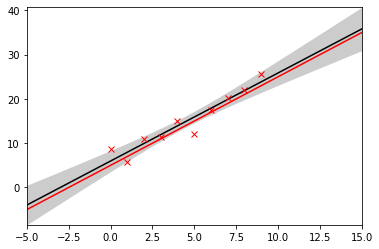

In [13]:
import bayespy.plot as bpplt
bpplt.pyplot.figure()
bpplt.plot(Fh, x=xh, scale=2)
bpplt.plot(y, x=x, color='r', marker='x', linestyle='None')
bpplt.plot(k*xh+c, x=xh, color='r');

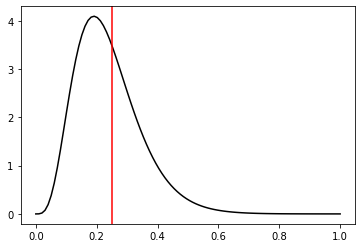

In [14]:
bpplt.pyplot.figure()
bpplt.pdf(tau, np.linspace(1e-6,1,100), color='k')
bpplt.pyplot.axvline(s**(-2), color='r');

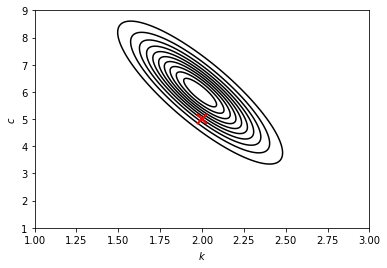

In [15]:
bpplt.pyplot.figure();
bpplt.contour(B, np.linspace(1,3,1000), np.linspace(1,9,1000),
              n=10, colors='k');
bpplt.plot(c, x=k, color='r', marker='x', linestyle='None',
           markersize=10, markeredgewidth=2)
bpplt.pyplot.xlabel(r'$k$');
bpplt.pyplot.ylabel(r'$c$');

In [8]:
import jax.numpy as np
from jax import random, vmap
from jax.scipy.special import logsumexp
import matplotlib.pyplot as plt
import numpy as onp
import pandas as pd
import seaborn as sns

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS

In [11]:
def model(age = None, sex = None, bmi = None, bp = None, y = None):
    alpha = numpyro.sample('alpha', dist.Normal(0., 100.))
    beta_age = numpyro.sample('beta_age', dist.Normal(0., 10.))
    beta_sex = numpyro.sample('beta_sex', dist.Normal(0., 10.))
    beta_bmi = numpyro.sample('beta_bmi', dist.Normal(0., 10.))
    beta_bp = numpyro.sample('beta_bp', dist.Normal(0., 10.))
    sigma = numpyro.sample('sigma', dist.HalfCauchy(scale=100.))
    mu_likelihood = alpha + beta_age * age + beta_sex * sex + beta_bmi * bmi + beta_bp * bp
    y_likelihood = numpyro.sample('y', dist.Normal(mu_likelihood, sigma), obs=y)

In [12]:
# Start from this source of randomness. We will split keys for subsequent operations.
rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)

num_warmup, num_samples = 1000, 2000

# Run NUTS.
kernel = NUTS(model)
mcmc = MCMC(kernel, num_warmup, num_samples)
mcmc.run(rng_key_, age=train.age.values, sex=train.sex.values, bmi=train.bmi.values, bp=train.bp.values, y=train.y.values)
mcmc.print_summary()
samples_1 = mcmc.get_samples()

sample: 100%|██████████| 3000/3000 [00:08<00:00, 335.45it/s, 7 steps of size 2.68e-01. acc. prob=0.91] 



                mean       std    median      5.0%     95.0%     n_eff     r_hat
     alpha      4.94      0.03      4.94      4.89      4.99    645.76      1.00
  beta_age      0.00      0.00      0.00     -0.00      0.00   2845.59      1.00
  beta_bmi      0.01      0.00      0.01      0.01      0.01   2481.20      1.00
   beta_bp      0.01      0.00      0.01      0.00      0.01   2438.17      1.00
  beta_sex     -0.10      0.05     -0.09     -0.18     -0.02    590.21      1.00
     sigma      0.44      0.02      0.44      0.41      0.47    852.74      1.00

Number of divergences: 0


In [15]:
from numpyro.infer import Predictive

rng_key, rng_key_ = random.split(rng_key)
predictive = Predictive(model, samples_1)
predictions = predictive.get_samples(rng_key_, age=test.age.values, sex=test.sex.values, bmi=test.bmi.values, bp=test.bp.values)['y']

preds = np.mean(predictions, axis=0)

In [66]:
def model(age = None, sex = None, bmi = None, bp = None, y = None):
    alpha = numpyro.sample('alpha', dist.Normal(0., 100.))
    beta_age = numpyro.sample('beta_age', dist.Normal(0., 10.))
    beta_sex = numpyro.sample('beta_sex', dist.Normal(0., 10.))
    beta_bmi = numpyro.sample('beta_bmi', dist.Normal(0., 10.))
    beta_bp = numpyro.sample('beta_bp', dist.Normal(0., 10.))
    sigma = numpyro.sample('sigma', dist.HalfCauchy(scale=100.))
    mu_likelihood = alpha + beta_age * age + beta_sex * sex + beta_bmi * bmi + beta_bp * bp
    y_likelihood = numpyro.sample('y', dist.Normal(mu_likelihood, sigma), obs=y)

In [81]:
def model():
    alpha = numpyro.sample('alpha', dist.Normal(0., 100.))
    beta_age = numpyro.sample('beta_age', dist.Normal(0., 10.))
    beta_sex = numpyro.sample('beta_sex', dist.Normal(0., 10.))
    beta_bmi = numpyro.sample('beta_bmi', dist.Normal(0., 10.))
    beta_bp = numpyro.sample('beta_bp', dist.Normal(0., 10.))
    sigma = numpyro.sample('sigma', dist.HalfCauchy(scale=100.))
    mu_likelihood = alpha + beta_age * age + beta_sex * sex + beta_bmi * bmi + beta_bp * bp
    y_likelihood = numpyro.sample('y', dist.Normal(mu_likelihood, sigma), obs=y)

In [82]:
def guide():
    # variational parameters
    var_alpha = numpyro.param('var_alpha', onp.array([0.]))
    var_alpha_sig = numpyro.param('var_alpha_sig', onp.array([100.]))
    var_beta_age = numpyro.param('var_beta_age', onp.array([0.]))
    var_beta_age_sig = numpyro.param('var_beta_age_sig', onp.array([10.]))
    var_beta_sex = numpyro.param('var_beta_sex', onp.array([0.]))
    var_beta_sex_sig = numpyro.param('var_beta_sex_sig', onp.array([10.]))
    var_beta_bmi = numpyro.param('var_beta_bmi', onp.array([0.]))
    var_beta_bmi_sig = numpyro.param('var_beta_bmi_sig', onp.array([10.]))
    var_beta_bp = numpyro.param('var_beta_bp', onp.array([0.]))
    var_beta_bp_sig = numpyro.param('var_beta_bp_sig', onp.array([10.]))
    var_sig = numpyro.param('var_sig', onp.array([100.]))

    # factorized distribution
    numpyro.sample('alpha', dist.Normal(var_alpha, var_alpha_sig))
    numpyro.sample('beta_age', dist.Normal(var_beta_age, var_beta_age_sig))
    numpyro.sample('beta_sex', dist.Normal(var_beta_sex, var_beta_sex_sig))
    numpyro.sample('beta_bmi', dist.Normal(var_beta_bmi, var_beta_bmi_sig))
    numpyro.sample('beta_bp', dist.Normal(var_beta_bp, var_beta_bp_sig))
    numpyro.sample('sigma', dist.Chi2(var_sig))


In [74]:
def guide():
    # variational parameters
    var_alpha = numpyro.param('var_alpha', 0.)
    var_alpha_sig = numpyro.param('var_alpha_sig', 100.)
    var_beta_age = numpyro.param('var_beta_age', 0.)
    var_beta_age_sig = numpyro.param('var_beta_age_sig', 10.)
    var_beta_sex = numpyro.param('var_beta_sex', 0.)
    var_beta_sex_sig = numpyro.param('var_beta_sex_sig', 10.)
    var_beta_bmi = numpyro.param('var_beta_bmi', 0.)
    var_beta_bmi_sig = numpyro.param('var_beta_bmi_sig', 10.)
    var_beta_bp = numpyro.param('var_beta_bp', 0.)
    var_beta_bp_sig = numpyro.param('var_beta_bp_sig', 10.)
    var_sig = numpyro.param('var_sig', 100.)

    # factorized distribution
    numpyro.sample('alpha', dist.Normal(var_alpha, var_alpha_sig))
    numpyro.sample('beta_age', dist.Normal(var_beta_age, var_beta_age_sig))
    numpyro.sample('beta_sex', dist.Normal(var_beta_sex, var_beta_sex_sig))
    numpyro.sample('beta_bmi', dist.Normal(var_beta_bmi, var_beta_bmi_sig))
    numpyro.sample('beta_bp', dist.Normal(var_beta_bp, var_beta_bp_sig))
    numpyro.sample('sigma', dist.Chi2(var_sig))


In [80]:
age = train.age.values
sex = train.sex.values
bmi = train.sex.values
bp = train.bp.values
y = train.y.values


In [83]:
from numpyro.infer import SVI, ELBO
from numpyro import optim
import argparse
from jax.random import PRNGKey


#svi = SVI(model, optim, loss, **static_kwargs)
adam = optim.Adam(0.001)
svi = SVI(model=model, guide=guide, optim=adam, loss=ELBO())
rng_key = PRNGKey(0)
rng_key, rng_key_binarize, rng_key_init = random.split(rng_key, 3)
svi_state = svi.init(rng_key_init)

In [84]:
c = 0
for step in range(5000):
    c += 1
    svi_state, loss = svi.update(svi_state)
    if step % 100 == 0:
        print("[iteration {:>4}] loss: {:.4f}".format(c, loss))

[iteration    1] loss: 4187.7573
[iteration  101] loss: 2740.4946
[iteration  201] loss: 4638.9219
[iteration  301] loss: 2616.2629
[iteration  401] loss: 3548.2993
[iteration  501] loss: 2342.4160
[iteration  601] loss: 5318.0259
[iteration  701] loss: 6712.9458
[iteration  801] loss: 3804.9067
[iteration  901] loss: 2237.3450
[iteration 1001] loss: 2503.5945
[iteration 1101] loss: 4354.6191
[iteration 1201] loss: 3913.8345
[iteration 1301] loss: 2186.6772
[iteration 1401] loss: 2416.1780
[iteration 1501] loss: 2322.9160
[iteration 1601] loss: 2014.3409
[iteration 1701] loss: 3007.1580
[iteration 1801] loss: 1952.1389
[iteration 1901] loss: 2963.3728
[iteration 2001] loss: 2157.5471
[iteration 2101] loss: 2241.6611
[iteration 2201] loss: 2695.5151
[iteration 2301] loss: 2510.5605
[iteration 2401] loss: 3328.5166
[iteration 2501] loss: 3729.8635
[iteration 2601] loss: 3242.8953
[iteration 2701] loss: 2945.9937


KeyboardInterrupt: 

In [49]:
from viabel import (all_bounds, error_bounds, wasserstein_bounds, divergence_bound)

In [50]:
import numpy as np
from scipy.stats import norm

MC_SAMPLES = 10000000
MC_TOL = 5/np.sqrt(MC_SAMPLES)


def _gaussian_alpha_divergence(alpha, var1, var2):
    """Compute D_alpha(N(0, var1) | N(0, var2))"""
    tmp = alpha*var2 - (alpha - 1)*var1
    print('tmp =', tmp)
    if tmp < 0:
        return np.inf
    return -0.5 / (alpha - 1) * np.log(tmp) + .5*alpha/(alpha - 1)*np.log(var2)  - .5*np.log(var1)

In [51]:
def _gaussian_kl_divergence(var1, var2):
    return .5*(var1/var2 + np.log(var2/var1) - 1)

def test_divergence_bound():
    np.random.seed(846)
    var1 = 4
    var2 = 16
    p1 = norm(scale=np.sqrt(var1))
    p2 = norm(scale=np.sqrt(var2))
    samples = p2.rvs(MC_SAMPLES)
    log_weights = p1.logpdf(samples) - p2.logpdf(samples)
    for alpha in [1.5, 2, 3]:
        print('alpha =', alpha)
        for elbo in [None, 0]:
            expected_dalpha = _gaussian_alpha_divergence(alpha, var1, var2)
            if elbo is None:
                expected_dalpha += alpha/(alpha - 1)*_gaussian_kl_divergence(var2, var1)
            np.testing.assert_allclose(
                divergence_bound(log_weights, alpha, elbo), expected_dalpha,
                atol=MC_TOL, rtol=MC_TOL, err_msg='incorrect d2 value')


In [52]:
def test_wasserstein_bounds():
    np.random.seed(341)
    d2 = 5.0
    stdev = 3.5
    samples = norm.rvs(scale=stdev, size=MC_SAMPLES)
    res = wasserstein_bounds(d2, samples)
    np.testing.assert_allclose(res['W1'], 2*stdev*np.sqrt(np.expm1(d2)),
                               rtol=MC_TOL, err_msg='incorrect W1 value')
    np.testing.assert_allclose(res['W2'], 2*stdev*(3*np.expm1(d2))**0.25,
                               rtol=MC_TOL, err_msg='incorrect W2 value')


def test_all_bounds():
    np.random.seed(1639)
    var1 = 2.5
    var2 = 9.3
    p1 = norm(scale=np.sqrt(var1))
    p2 = norm(scale=np.sqrt(var2))
    samples = p2.rvs(MC_SAMPLES)
    log_weights = p1.logpdf(samples) - p2.logpdf(samples)
    res = all_bounds(log_weights, samples, q_var=var2, log_norm_bound=None)
    print('KL =', _gaussian_kl_divergence(var2, var1))
    expected_d2 = _gaussian_alpha_divergence(2, var1, var2) + 2*_gaussian_kl_divergence(var2, var1)
    np.testing.assert_allclose(res['d2'], expected_d2,
                               rtol=MC_TOL, err_msg='incorrect d2 value')
    stdev2 = np.sqrt(var2)
    np.testing.assert_allclose(res['W1'], 2*stdev2*np.sqrt(np.expm1(res['d2'])),
                               rtol=MC_TOL, err_msg='incorrect W1 value')
    np.testing.assert_allclose(res['W2'], 2*stdev2*(3*np.expm1(res['d2']))**0.25,
                               rtol=MC_TOL, err_msg='incorrect W2 value')

In [53]:
test_divergence_bound()

alpha = 1.5
tmp = 22.0
log norm bound = -0.8086272316845782
tmp = 22.0
alpha = 2
tmp = 28
log norm bound = -0.8086272316845782
tmp = 28
alpha = 3
tmp = 40
log norm bound = -0.8086272316845782
tmp = 40


In [54]:
test_all_bounds()

log norm bound = -0.7030271020227442
KL = 0.7031381658574725
tmp = 16.1


In [59]:
from scipy.stats import t
q = t(df=40)

In [57]:
np.random.seed(1639)
var1 = 2.5
var2 = 9.3
p1 = norm(scale=np.sqrt(var1))
p2 = norm(scale=np.sqrt(var2))
samples = p2.rvs(MC_SAMPLES)
log_weights = p1.logpdf(samples) - p2.logpdf(samples)

all_bounds(log_weights, samples=samples, moment_bound_fn=None, q_var=var2, p_var=None, log_norm_bound=None)

log norm bound = -0.7030271020227442


{'W1': 13.611489250514017,
 'W2': 11.990735035586583,
 'mean_error': 11.990735035586583,
 'std_error': 23.164321294124502,
 'var_error': 857.2015660460681,
 'd2': 1.7885635433590648}

In [58]:
p1 = norm(scale=np.sqrt(var1))
p1

In [62]:
samples = q.rvs(MC_SAMPLES)
log_weights = p1.logpdf(samples) - q.logpdf(samples)

all_bounds(log_weights, samples=samples, moment_bound_fn=None, q_var=None, p_var=None, log_norm_bound=None)

log norm bound = -0.14334956723498207


{'W1': 3.1095848584325143,
 'W2': 3.3696430187235946,
 'mean_error': 3.1095848584325143,
 'std_error': 6.509650434319557,
 'var_error': 69.30860465330373,
 'd2': 1.1924816230210555}